# COVID-19 : Modelo preditivo e Storytelling

Objetivo:
Desenvolver um modelo preditivo para prever o resultado do teste para SARS-Cov-2 (COVID-19), se positivo ou negativo.



# **Estrutura do notebook**
1. Bibliotecas
2. Importando os dados
3. Explorando os dados
4. Extraindo informações
5. Limpando os dados
6. Extraindo valores nulos
7. Features e target
8. Preparando os dados para machine learning

> 8.1 Criando o arquivo de treinamento e teste

> 8.2 Treinando o modelo

  > 8.2.1 Modelo K Neighbors

  > 8.2.2 Modelo KMeans

> 8.2.3 Modelo ExtraTreesClassifier

> 8.2.4 Modelo RandomForestClassifier

> 8.2.5 Modelo SVM(Support Vector Machine)
      
      
9. Conclusão

# 1.Bibliotecas

In [ ]:
#Biblioteca para operações matemáticas
import numpy as np 

# Biblioteca para processar arquivo csv
import pandas as pd 

# Biblioteca para plotar gráficos
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind 
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


# 2. Importando os dados

In [ ]:
dataset = pd.read_excel('data/dataset.xlsx')

# 3. Explorando os dados

In [ ]:
# Verificando as primeira linhas do dataset
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)
dataset.head(30)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# 4. Extraindo informações

In [ ]:
# Verificando a quantidade de linhas e colunas do dataset
dataset.shape

(5644, 111)

In [ ]:
# Extraindo informações
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.0+ MB


In [ ]:
# Entendendo os campos do dataset
dataset.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient ID,5644,5644,bafefa1d82bb304,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient age quantile,5644.0,NaN,NaN,NaN,9.318391,5.777903,0.000000,4.000000,9.000000,14.000000,19.000000
SARS-Cov-2 exam result,5644,2,negative,5086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Patient addmited to regular ward (1=yes, 0=no)",5644.0,NaN,NaN,NaN,0.013997,0.117489,0.000000,0.000000,0.000000,0.000000,1.000000
"Patient addmited to semi-intensive unit (1=yes, 0=no)",5644.0,NaN,NaN,NaN,0.008859,0.093713,0.000000,0.000000,0.000000,0.000000,1.000000
"Patient addmited to intensive care unit (1=yes, 0=no)",5644.0,NaN,NaN,NaN,0.007264,0.084929,0.000000,0.000000,0.000000,0.000000,1.000000
Hematocrit,603.0,NaN,NaN,NaN,-0.000000,1.000830,-4.501420,-0.518807,0.053407,0.717175,2.662704
Hemoglobin,603.0,NaN,NaN,NaN,-0.000000,1.000830,-4.345603,-0.586244,0.040316,0.729532,2.671868
Platelets,602.0,NaN,NaN,NaN,-0.000000,1.000832,-2.552426,-0.605346,-0.121716,0.531498,9.532034
Mean platelet volume,599.0,NaN,NaN,NaN,0.000000,1.000836,-2.457575,-0.662483,-0.101517,0.683835,3.713052


In [ ]:
# Encontrando o número de casospositivos e negativos do SARS-Cov-2 Cases
print("\nNúmero de casos positivos e negativosdo SARS-COV-2")
dataset['SARS-Cov-2 exam result'].value_counts()


Número de casos positivos e negativosdo SARS-COV-2


0    5086
1     558
Name: SARS-Cov-2 exam result, dtype: int64

# 5. Limpando os dados

In [ ]:
# Excluindo as colunas que não são importantes para a análise dos dados
dataset.drop(columns=['Patient ID',
                      'Patient addmited to regular ward (1=yes, 0=no)',
                      'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                      'Patient addmited to intensive care unit (1=yes, 0=no)'], inplace=True)

In [ ]:
# Verificando os valores nulos
total_null_values = dataset.isnull().sum().sort_values(ascending=False) 
not_null_values = dataset.notnull().sum().sort_values(ascending=False) 
null_values_percentage = (dataset.isnull().sum()/dataset.notnull().count().sort_values(ascending=False)) * 100

# Calculando o percentual de valores nulos
dataset_missing_values = pd.concat({'Null': total_null_values, 'Not Null': not_null_values, 'Percentage': null_values_percentage}, axis=1)

# Visualizar os dados formatados
dataset_missing_values

,Null,Not Null,Percentage
Mycoplasma pneumoniae,5644,0,100.000000
Urine - Sugar,5644,0,100.000000
Partial thromboplastin time (PTT),5644,0,100.000000
"Prothrombin time (PT), Activity",5644,0,100.000000
D-Dimer,5644,0,100.000000
Fio2 (venous blood gas analysis),5643,1,99.982282
Urine - Nitrite,5643,1,99.982282
Vitamin B12,5641,3,99.946846
Lipase dosage,5636,8,99.858257
Albumin,5631,13,99.769667


<AxesSubplot:>

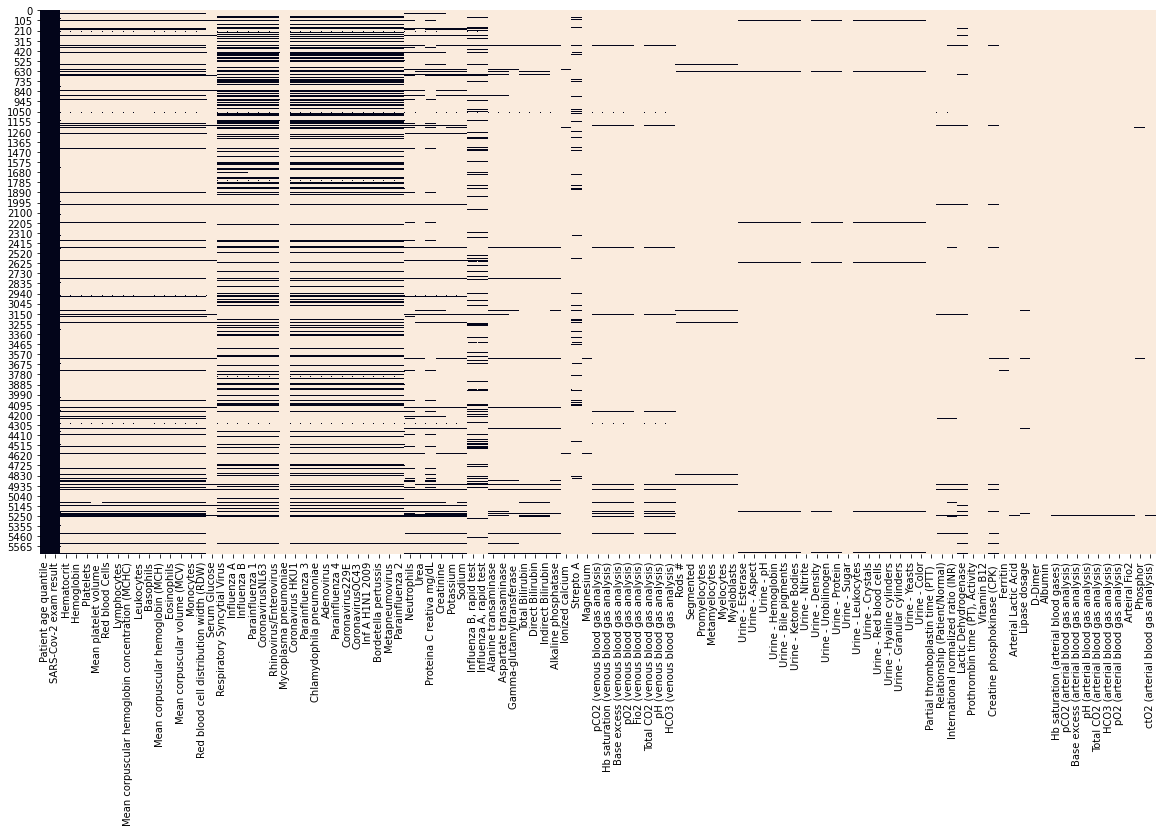

In [ ]:
#Verificando as colunas com valores nulos.Mais da metade das colunas tem menos de 20% de dados
plt.figure(figsize=(20,10))
sns.heatmap(dataset.isna(), cbar=False)

Text(0.5, 1.0, 'Missing Data in our Dataset')

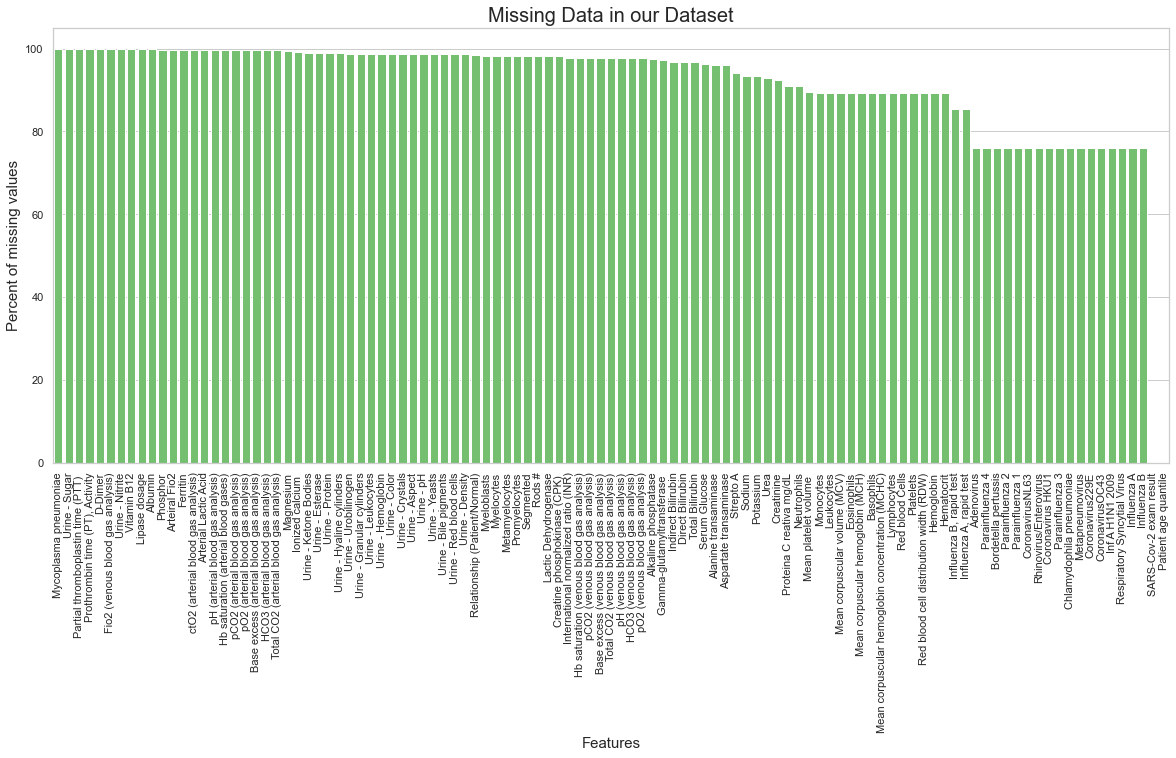

In [ ]:
sns.set(style="whitegrid")

# Inicializando o matplotlib 
fig, axs = plt.subplots(figsize=(20,8))

# plot the Total Missing Values
sns.set_color_codes("muted")
sns.barplot(x=dataset_missing_values.index, y="Percentage", data=dataset_missing_values, color="g")

# customizing Bar Graph
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Missing Data in our Dataset', fontsize=20)

In [ ]:
#Encontrando colunas com 100% de valores nulos
dataset_missing_values[dataset_missing_values['Percentage']==100]

,Null,Not Null,Percentage
Mycoplasma pneumoniae,5644,0,100.0
Urine - Sugar,5644,0,100.0
Partial thromboplastin time (PTT),5644,0,100.0
"Prothrombin time (PT), Activity",5644,0,100.0
D-Dimer,5644,0,100.0


In [ ]:
#Encontrando colunas que não possuem mais do que 5 valores
dataset_missing_values[dataset_missing_values['Not Null'] <= 6]

,Null,Not Null,Percentage
Mycoplasma pneumoniae,5644,0,100.000000
Urine - Sugar,5644,0,100.000000
Partial thromboplastin time (PTT),5644,0,100.000000
"Prothrombin time (PT), Activity",5644,0,100.000000
D-Dimer,5644,0,100.000000
Fio2 (venous blood gas analysis),5643,1,99.982282
Urine - Nitrite,5643,1,99.982282
Vitamin B12,5641,3,99.946846


In [ ]:
#Excluindo as colunas acima
dataset.drop(columns=['Mycoplasma pneumoniae','Urine - Sugar','Prothrombin time (PT), Activity','D-Dimer','Fio2 (venous blood gas analysis)','Urine - Nitrite','Vitamin B12'], inplace=True)

# 6.Substituindo valores nulos

In [ ]:
#Substituindo valores NaNs por 0
dataset = dataset.fillna(0)

In [ ]:
#Substituindo os valores afirmativo/positivo values para 1 and todos negativos valores por 0
dataset.replace('not_detected', 0, inplace=True)
dataset.replace('not_done', 0, inplace=True)
dataset.replace('detected', 1, inplace=True)
dataset.replace('absent', 0, inplace=True)
dataset.replace('present', 1, inplace=True)
dataset.replace('negative', 0, inplace=True)
dataset.replace('positive', 1, inplace=True)



In [ ]:
# Visualizando Dataset
dataset

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0

# 7.Features e target

<AxesSubplot:xlabel='SARS-Cov-2 exam result', ylabel='Monocytes'>

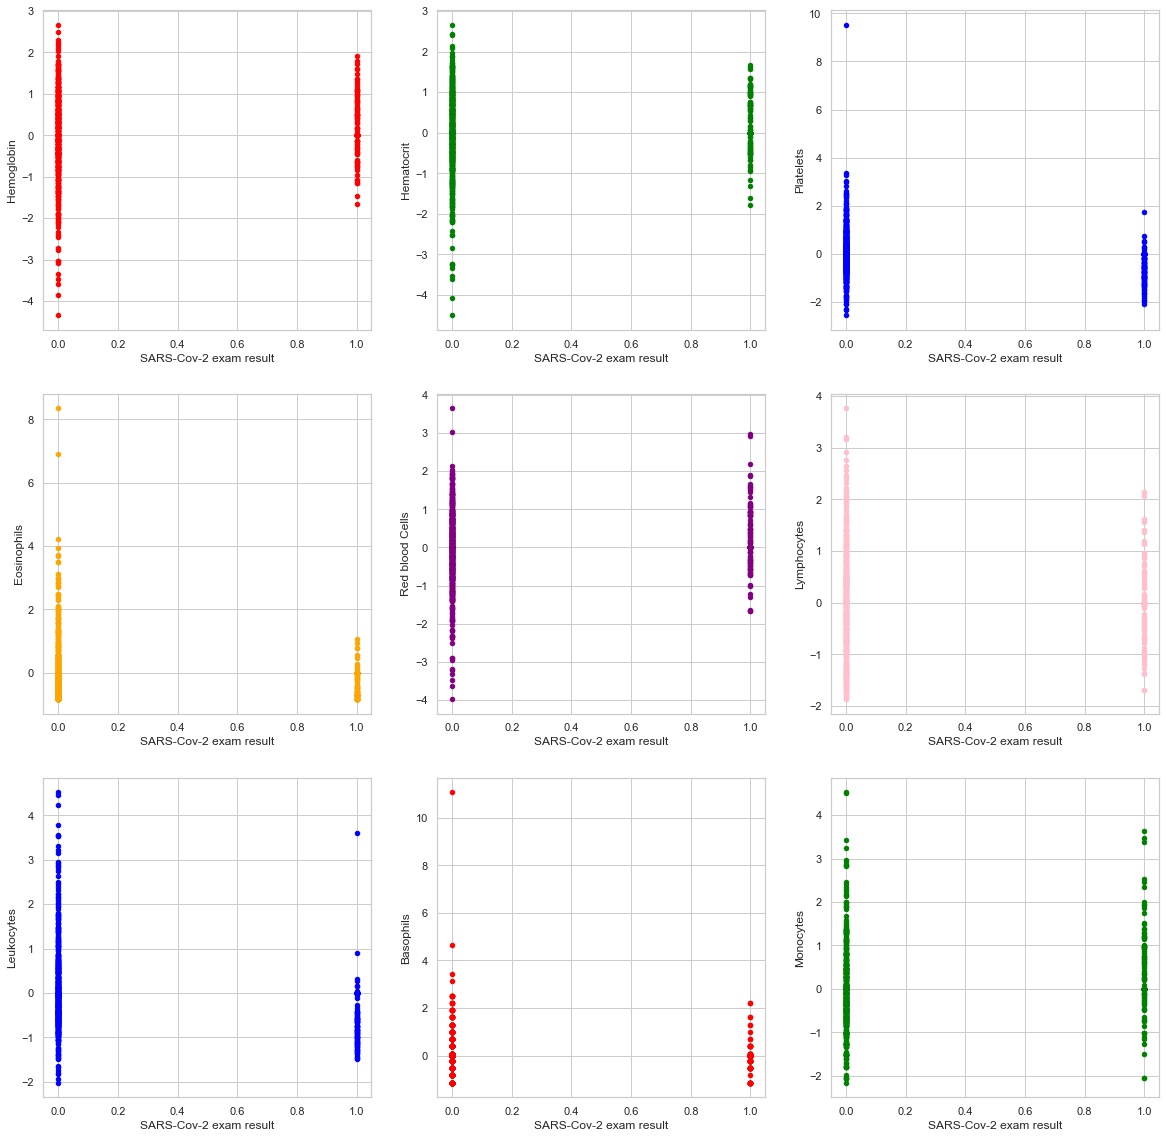

In [ ]:
# Visualizando a relação entre as features e targets usando scatterplots
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
dataset.plot(kind='scatter', x='SARS-Cov-2 exam result', y='Hemoglobin',ax=axs[0,0], c='red')
dataset.plot(kind='scatter',  x='SARS-Cov-2 exam result', y='Hematocrit', ax=axs[0,1], c='green')
dataset.plot(kind='scatter', x='SARS-Cov-2 exam result', y='Platelets',ax=axs[0,2], c='blue')
dataset.plot(kind='scatter',  x='SARS-Cov-2 exam result', y='Eosinophils', ax=axs[1,0], c='orange')
dataset.plot(kind='scatter', x='SARS-Cov-2 exam result', y='Red blood Cells',ax=axs[1,1], c='purple')
dataset.plot(kind='scatter',  x='SARS-Cov-2 exam result', y='Lymphocytes', ax=axs[1,2], c='pink')
dataset.plot(kind='scatter', x='SARS-Cov-2 exam result', y='Leukocytes',ax=axs[2,0], c='blue')
dataset.plot(kind='scatter',  x='SARS-Cov-2 exam result', y='Basophils', ax=axs[2,1], c='red')
dataset.plot(kind='scatter',  x='SARS-Cov-2 exam result', y='Monocytes', ax=axs[2,2], c='green')

<AxesSubplot:>

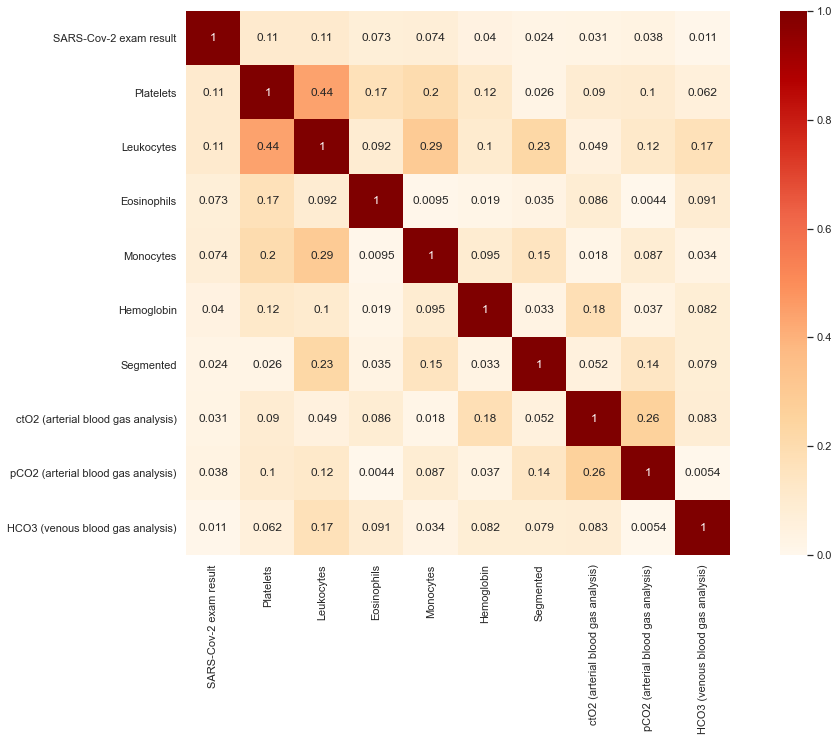

In [ ]:
# Visualizar a matriz de correlação usando heatmap
corr_matrix = abs(dataset.corr())

#Correlação com a target
corr_target = corr_matrix["SARS-Cov-2 exam result"]

#Selecionando as features com maior correlação
relevant_features = ["SARS-Cov-2 exam result","Platelets","Leukocytes","Eosinophils","Monocytes","Hemoglobin","Segmented","ctO2 (arterial blood gas analysis)","pCO2 (arterial blood gas analysis)","HCO3 (venous blood gas analysis)"]

# Plotando a matriz
fig, axs = plt.subplots(figsize=(18, 10))
sns.heatmap(abs(dataset[relevant_features].corr()), yticklabels=relevant_features, xticklabels=relevant_features, vmin = 0.0, square=True, annot=True, vmax=1.0, cmap='OrRd')

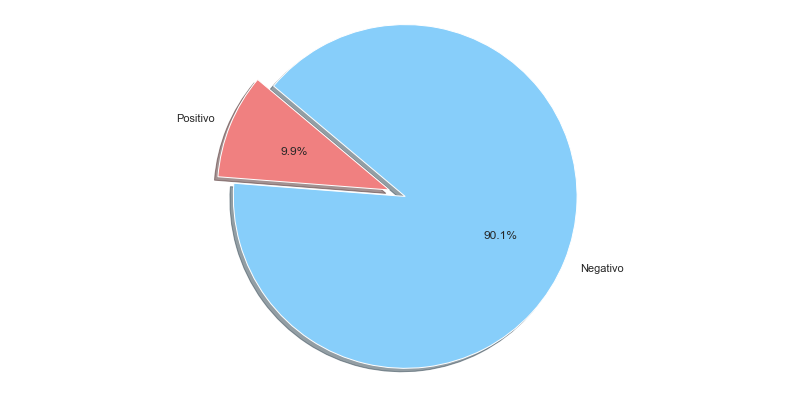

In [ ]:
#Visualizar casos positivos x casos negativos
dataset_negative = dataset['SARS-Cov-2 exam result'] == 0
dataset_positive = dataset['SARS-Cov-2 exam result'] == 1

# Plotando o gráfico
labels = 'Positivo', 'Negativo'
sizes = [dataset_positive.sum(), dataset_negative.sum()]
colors = ['lightcoral', 'lightskyblue']
# explode 1st slice
explode = (0.1, 0) 


fig, axs = plt.subplots(figsize=(14, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)



plt.axis('equal')
plt.show()



# 8.Preparando os dados para Machine Learning

In [ ]:
#Modelos de treinamento
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
best_score = 0

# 8.1. Criando arquivo de treinamento e teste

In [ ]:
#Dividir o dataset em treinamento e teste
from sklearn.model_selection import train_test_split

In [ ]:
# Definir a variável target 
target = dataset['SARS-Cov-2 exam result']

# Definir as variávies preditoras
features = dataset.select_dtypes(exclude=[object])

#X_train = features
#X_test = target

# Dividindo o dataset
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify = target)

In [ ]:
print('Base de treinamento(y_train)')
print("Total: %d" % y_train.shape)
print("Positivo: %d" % (y_train == 1).sum(axis=0))
print("Negativo: %d" % (y_train == 0).sum(axis=0))
print()
print('Base de teste(y_test)')
print("Total: %d" % y_test.shape)
print("Positivo: %d" % (y_test == 1).sum(axis=0))
print("Negativo: %d" % (y_test == 0).sum(axis=0))

Base de treinamento(y_train)
Total: 3950
Positivo: 391
Negativo: 3559

Base de teste(y_test)
Total: 1694
Positivo: 167
Negativo: 1527


In [ ]:
# Visualizar em HTML 
from IPython.display import display_html

X_train_data = X_train.describe().style.set_table_attributes("style='display:inline'").set_caption('Summary of Training Data')
X_test_data = X_test.describe().style.set_table_attributes("style='display:inline'").set_caption('Summary of Testing Data')

# Comparar base te teste e treinamento
display_html(X_train_data._repr_html_(), raw = True)
display_html(X_test_data._repr_html_(), raw = True)

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Density,Urine - Protein,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000
mean,9.254177,0.098987,0.002785,0.003590,0.005637,-0.001059,0.004458,0.004717,0.003713,0.001598,0.001392,-0.002743,0.004889,-0.004696,-0.000297,-0.002991,-0.000331,0.008608,0.003291,0.014937,0.000506,0.008101,0.068861,0.002532,0.001772,0.001266,0.003038,0.002785,0.001013,0.001519,0.017722,0.000253,0.002278,0.000000,-0.003478,-0.000473,-0.000835,0.001118,0.002423,-0.002729,0.008608,0.009873,0.002143,0.001309,-0.000344,0.000011,-0.000839,0.000726,-0.000604,-0.001110,0.006076,0.000055,0.001327,0.000442,0.000435,0.000345,0.000826,-0.000716,0.000782,-0.002391,0.000138,0.000775,-0.000459,-0.001664,0.000000,0.000000,0.002785,0.000000,0.000000,0.001454,0.000000,-0.001094,0.000000,0.000000,0.000000,0.000000,0.001504,-0.000761,0.001863,-0.000690,0.000503,-0.001043,-0.000185,0.000799,0.000923,-0.001912,0.000819,0.001973,-0.000946,-0.000766,0.000278,-0.000334,-0.000605,-0.000272
std,5.775991,0.29

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Density,Urine - Protein,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000
mean,9.468123,0.098583,-0.006495,-0.008371,-0.013144,0.002469,-0.010396,-0.011000,-0.008658,-0.003725,-0.003246,0.006396,-0.011400,0.010951,0.000692,0.006975,0.000771,0.010626,0.002952,0.010626,0.000590,0.007674,0.063164,0.005903,0.001771,0.002361,0.000590,0.004723,0.002952,0.001181,0.016529,0.000590,0.002952,0.000000,0.008110,0.001103,0.001948,-0.002606,-0.005649,0.006364,0.008855,0.007674,-0.004997,-0.003052,0.000802,-0.000026,0.001956,-0.001693,0.001408,0.002589,0.005903,-0.000129,-0.003094,-0.001030,-0.001013,-0.000805,-0.001926,0.001669,-0.001824,0.005575,-0.000323,-0.001807,0.001070,0.003881,0.000000,0.000000,0.002952,0.000000,0.000000,-0.003391,0.000000,0.002551,0.000000,0.000000,0.000000,0.000000,-0.003508,0.001775,-0.004344,0.001610,-0.001174,0.002432,0.000431,-0.001863,-0.002151,0.004458,-0.001909,-0.004599,0.002205,0.001786,-0.000647,0.000779,0.001410,0.000634
std,5.781296,

In [ ]:
# Para pesquisa exaustiva sobre valores de parâmetros especificados para um estimador
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.cluster import completeness_score

In [ ]:
#Atribuindo o dicionário de variáveis cujo valor ótimo deve ser recuperado
#Parâmetros KNN
param_grid = {'n_neighbors' : np.arange(1,50)}

In [ ]:
#Executando grid Search CV no modelo knn
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# 8.2 Treinando o modelo

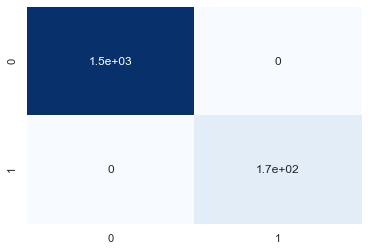

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1527
           1       1.00      1.00      1.00       167

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694



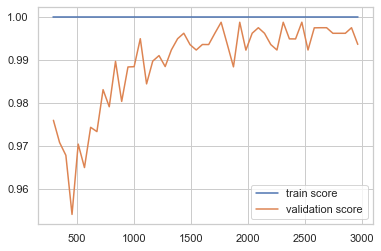

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

def evaluation(model):
    #Gerar valores preditivos
    y_pred = model.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues', cbar=False)
    plt.show()
    
    #Imprimir a matriz de confusão
    print(classification_report(y_test,y_pred))
    N, train_score, val_score = learning_curve(model,X_train,y_train, scoring='f1', cv=4, train_sizes=np.linspace(0.1,1))
    
    #Imprimir o gráfico
    plt.plot(N,train_score.mean(axis=1), label='train score')
    plt.plot(N,val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.show()
    
model = RandomForestClassifier()
model.fit(X_train,y_train)
evaluation(model)

# 8.2.1  Modelo K Neighbors

In [ ]:
#Instanciar o modelo KNeighborsClassifier
knn = KNeighborsClassifier()
# training the model with the training data and best parameter
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
#Encontrar o melhor parâmetro para o modelo
print("Melhor parâmetro: {}" .format(knn_cv.best_params_))
#Encontrar o melhor score do parÇametro escolhido
print("O melhor score: {}" .format(knn_cv.best_score_))


Melhor parâmetro: {'n_neighbors': 7}
O melhor score: 0.9956962025316456


In [ ]:
#Gerar valores preditivos vaseado no dataset de test
y_pred = knn_cv.predict(X_test)

In [ ]:
# O método Score utilizado para calcular a precisão média para os dados do teste
print("Acurácia dos dados de teste: {}" .format(knn_cv.score(X_train,y_train)))
print("Acurácia dos dados de treinamento: {}" .format(knn_cv.score(X_test,y_test)))

A acurácia dos dados de teste: 0.9951898734177215
A acurácia dos dados de treinamento: 0.9970484061393152


In [ ]:
#Biblioteca para métrica de desempenho
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [ ]:
# Imprimindo a matriz de confusão
print(confusion_matrix(y_test, y_pred))

[[1527    0]
 [   5  162]]


In [ ]:
#Verificar a acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9970484061393152

# 8.2.3 Modelo KMeans

In [ ]:
#Instanciar o modelo KMeans
from sklearn.metrics.cluster import completeness_score
KM = KMeans(n_clusters=9)
#Treinar o modelo

KM.fit(X_train,y_train)
print(f"Best f1 score : {completeness_score(KM.predict(X_test),y_test)} for hyperparameters : n_clusters = 9")
if best_score<grid.best_score_:
    best_score = grid.best_score_
    model_name = "KMeans"

Best f1 score : 0.05141105765933019 for hyperparameters : n_clusters = 9


In [ ]:
#Gerar valores preditivos vaseado no dataset de test
k_pred = KM.predict(X_test)

In [ ]:
# O método Score utilizado para calcular a precisão média para os dados do teste
print("Acurácia dos dados de teste: {}" .format(KM.score(X_train,y_train)))
print("Acurácia dos dados de treinamento: {}" .format(KM.score(X_test,y_test)))

A acurácia dos dados de teste: -12448.861520086415
A acurácia dos dados de treinamento: -5754.253337047376


In [ ]:
#Verificar a acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, k_pred)

0.14994096812278632

In [ ]:
 8.2.3 Modelo ExtraTreesClassifier

In [ ]:
#Instanciar o modelo ExtraTreesClassifier
hyperparameters = {'n_estimators': [500,700,800,900,1000],'max_features':['auto','sqrt','log2'], 'max_depth':[10,20,30]}
grid = GridSearchCV(ExtraTreesClassifier(), hyperparameters, cv=5, scoring="f1")
#Treinar o modelo
grid.fit(X_train,y_train)
n_e,max_f,max_d= grid.best_params_['n_estimators'],grid.best_params_['max_features'],grid.best_params_['max_depth']
print(f"Best score : {grid.best_score_} for hyperparameters : {grid.best_params_}")
evaluation(grid.best_estimator_)
if best_score<grid.best_score_:
    best_score = grid.best_score_
    model_name = "ExtraTreesClassifier"

In [ ]:
 8.2.4 Modelo RandomForestClassifier

In [ ]:
#Instanciar o modelo RandomForestClassifier
hyperparameters = {'n_estimators': [1500,2000,2500,3000,4000],'max_features':['auto','sqrt','log2'], 'max_depth':[10,20,30]}
grid = GridSearchCV(RandomForestClassifier(), hyperparameters, cv=5, scoring="f1")
#Treinar o modelo
grid.fit(X_train,y_train)
n_estimators,max_features,max_depth = grid.best_params_['n_estimators'],grid.best_params_['max_features'],grid.best_params_['max_depth']
print(f"Best f1 score : {grid.best_score_} for hyperparameters : {grid.best_params_}")
evaluation(grid.best_estimator_)
if best_score<grid.best_score_:
    best_score = grid.best_score_
    model_name = "RandomForestClassifier"

In [ ]:
 8.2.5 Modelo SVM(Support Vector Machine)

In [ ]:
#Instanciar o modelo SVM
hyperparameters = {'C': np.arange(0.5,5,0.2), 'kernel':['linear', 'rbf', 'sigmoid'], 'gamma':np.linspace(1e-5,1,60)}
grid = GridSearchCV(SVC(), hyperparameters, scoring="f1", cv=5)
#Treinar o modelo
grid.fit(X_train,y_train)
C, kernel, gamma = grid.best_params_['C'],grid.best_params_['kernel'],grid.best_params_['gamma']    
print(f"Best f1 score : {grid.best_score_} for hyperparameters : {grid.best_params_}")
evaluation(grid.best_estimator_)
if best_score<grid.best_score_:
    best_score = grid.best_score_
    model_name = "SVM"

# 9.Conclusão

O melhor modelo é o K Neighbors que apresentou 99,7% de precisão em relação aos valores preditivos.
Os algoritmos ExtraTreesClassifier, Random Forest e SVM (Support Vector Machine) foram testados também, mas não foi possível obter resultados devido ao alto tempo de processamento.